# ROOT in CoCalc

This uses the "ROOT" kernel, and shows some randomly picked examples from https://root.cern.ch/root/html608/group__Tutorials.html

In [1]:
TCanvas *c1 = new TCanvas("c1","test",600,700);

In [2]:
TLatex l;
l.SetTextAlign(12);
l.SetTextSize(0.04);
l.DrawLatex(0.1,0.9,"1)   C(x) = d #sqrt{#frac{2}{#lambdaD}}\
#int^{x}_{0}cos(#frac{#pi}{2}t^{2})dt");
l.DrawLatex(0.1,0.7,"2)   C(x) = d #sqrt{#frac{2}{#lambdaD}}\
#int^{x}cos(#frac{#pi}{2}t^{2})dt");
l.DrawLatex(0.1,0.5,"3)   R = |A|^{2} = #frac{1}{2}#left(#[]{#frac{1}{2}+\
C(V)}^{2}+#[]{#frac{1}{2}+S(V)}^{2}#right)");
l.DrawLatex(0.1,0.3,
"4)   F(t) = #sum_{i=-#infty}^{#infty}A(i)cos#[]{#frac{i}{t+i}}");
l.DrawLatex(0.1,0.1,"5)   {}_{3}^{7}Li");
c1->Print("latex.ps");

Info in <TCanvas::Print>: ps file latex.ps has been created


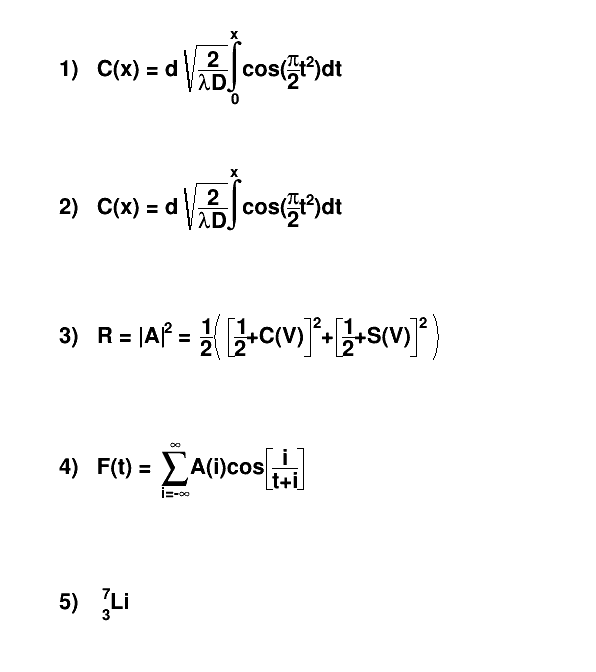

In [3]:
gROOT->GetListOfCanvases()->Draw()

In [4]:
TCanvas * CPol = new TCanvas("CPol","TGraphPolar Examples",1200,600);
CPol->Divide(2,1);
CPol->cd(1);

Double_t xmin=0;
Double_t xmax=TMath::Pi()*2;

Double_t x[1000];
Double_t y[1000];
Double_t xval1[20];
Double_t yval1[20];

TF1 * fplot = new TF1("fplot","cos(2*x)*cos(20*x)",xmin,xmax);

for (Int_t ipt = 0; ipt < 1000; ipt++){
   x[ipt] = ipt*(xmax-xmin)/1000+xmin;
   y[ipt] = fplot->Eval(x[ipt]);
}

TGraphPolar * grP = new TGraphPolar(1000,x,y);
grP->SetLineColor(2);
grP->SetLineWidth(2);
grP->SetFillStyle(3012);
grP->SetFillColor(2);
grP->Draw("AFL");

for (Int_t ipt = 0; ipt < 20; ipt++){
   xval1[ipt] = x[1000/20*ipt];
   yval1[ipt] = y[1000/20*ipt];
}

TGraphPolar * grP1 = new TGraphPolar(20,xval1,yval1);
grP1->SetMarkerStyle(29);
grP1->SetMarkerSize(2);
grP1->SetMarkerColor(4);
grP1->SetLineColor(4);
grP1->Draw("CP");

In [5]:
CPol->Update();
grP1->GetPolargram()->SetTextColor(8);
grP1->GetPolargram()->SetRangePolar(-TMath::Pi(),TMath::Pi());
grP1->GetPolargram()->SetNdivPolar(703);
grP1->GetPolargram()->SetToRadian();

CPol->cd(2);
Double_t x2[30];
Double_t y2[30];
Double_t ex[30];
Double_t ey[30];
for (Int_t ipt = 0; ipt < 30; ipt++){
   x2[ipt] = x[1000/30*ipt];
   y2[ipt] = 1.2 + 0.4*sin(TMath::Pi()*2*ipt/30);
   ex[ipt] = 0.2+0.1*cos(2*TMath::Pi()/30*ipt);
   ey[ipt] = 0.2;
}

TGraphPolar * grPE = new TGraphPolar(30,x2,y2,ex,ey);
grPE->SetMarkerStyle(22);
grPE->SetMarkerSize(1.5);
grPE->SetMarkerColor(5);
grPE->SetLineColor(6);
grPE->SetLineWidth(2);
grPE->Draw("EP");
CPol->Update();
grPE->GetPolargram()->SetTextSize(0.03);
grPE->GetPolargram()->SetTwoPi();
grPE->GetPolargram()->SetToRadian();

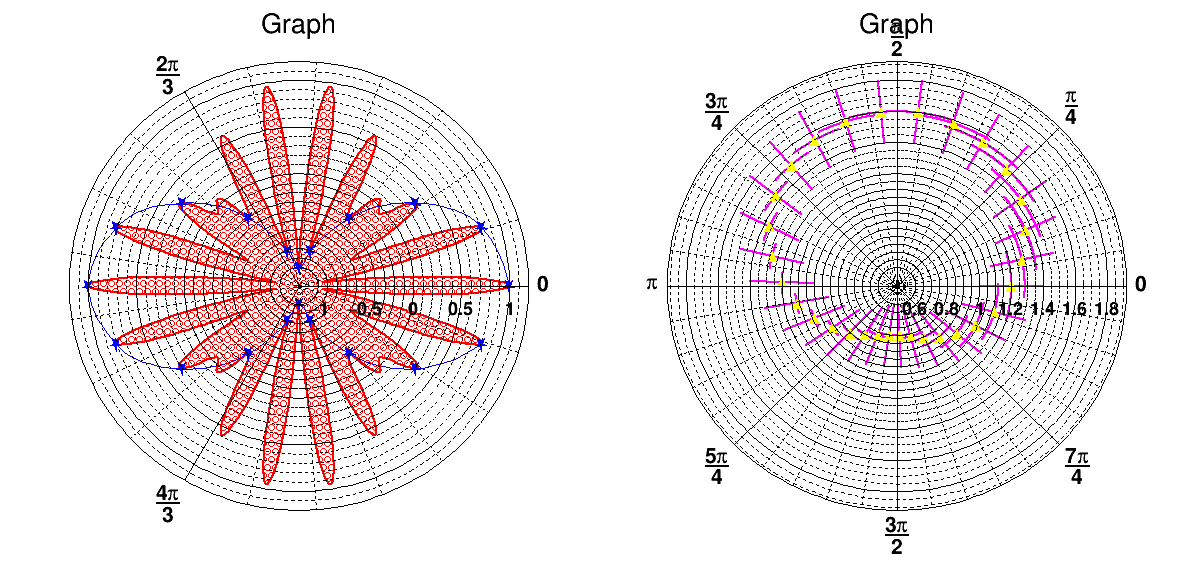

In [6]:
gROOT->GetListOfCanvases()->Last()->Draw()

In [7]:
#include "TH1D.h"
#include "TVirtualFFT.h"
#include "TF1.h"
#include "TCanvas.h"
#include "TMath.h"

In [8]:
void FFT()
{
   // Histograms
   // =========
   //prepare the canvas for drawing
   TCanvas *myc = new TCanvas("myc", "Fast Fourier Transform", 800, 600);
   myc->SetFillColor(45);
   TPad *c1_1 = new TPad("c1_1", "c1_1",0.01,0.67,0.49,0.99);
   TPad *c1_2 = new TPad("c1_2", "c1_2",0.51,0.67,0.99,0.99);
   TPad *c1_3 = new TPad("c1_3", "c1_3",0.01,0.34,0.49,0.65);
   TPad *c1_4 = new TPad("c1_4", "c1_4",0.51,0.34,0.99,0.65);
   TPad *c1_5 = new TPad("c1_5", "c1_5",0.01,0.01,0.49,0.32);
   TPad *c1_6 = new TPad("c1_6", "c1_6",0.51,0.01,0.99,0.32);
   c1_1->Draw();
   c1_2->Draw();
   c1_3->Draw();
   c1_4->Draw();
   c1_5->Draw();
   c1_6->Draw();
   c1_1->SetFillColor(30);
   c1_1->SetFrameFillColor(42);
   c1_2->SetFillColor(30);
   c1_2->SetFrameFillColor(42);
   c1_3->SetFillColor(30);
   c1_3->SetFrameFillColor(42);
   c1_4->SetFillColor(30);
   c1_4->SetFrameFillColor(42);
   c1_5->SetFillColor(30);
   c1_5->SetFrameFillColor(42);
   c1_6->SetFillColor(30);
   c1_6->SetFrameFillColor(42);
   c1_1->cd();
   TH1::AddDirectory(kFALSE);
   //A function to sample
   TF1 *fsin = new TF1("fsin", "sin(x)+sin(2*x)+sin(0.5*x)+1", 0, 4*TMath::Pi());
   fsin->Draw();
   Int_t n=25;
   TH1D *hsin = new TH1D("hsin", "hsin", n+1, 0, 4*TMath::Pi());
   Double_t x;
   //Fill the histogram with function values
   for (Int_t i=0; i<=n; i++){
      x = (Double_t(i)/n)*(4*TMath::Pi());
      hsin->SetBinContent(i+1, fsin->Eval(x));
   }
   hsin->Draw("same");
   fsin->GetXaxis()->SetLabelSize(0.05);
   fsin->GetYaxis()->SetLabelSize(0.05);
   c1_2->cd();
   //Compute the transform and look at the magnitude of the output
   TH1 *hm =0;
   TVirtualFFT::SetTransform(0);
   hm = hsin->FFT(hm, "MAG");
   hm->SetTitle("Magnitude of the 1st transform");
   hm->Draw();
   //NOTE: for "real" frequencies you have to divide the x-axes range with the range of your function
   //(in this case 4*Pi); y-axes has to be rescaled by a factor of 1/SQRT(n) to be right: this is not done automatically!
   hm->SetStats(kFALSE);
   hm->GetXaxis()->SetLabelSize(0.05);
   hm->GetYaxis()->SetLabelSize(0.05);
   c1_3->cd();
   //Look at the phase of the output
   TH1 *hp = 0;
   hp = hsin->FFT(hp, "PH");
   hp->SetTitle("Phase of the 1st transform");
   hp->Draw();
   hp->SetStats(kFALSE);
   hp->GetXaxis()->SetLabelSize(0.05);
   hp->GetYaxis()->SetLabelSize(0.05);
   //Look at the DC component and the Nyquist harmonic:
   Double_t re, im;
   //That's the way to get the current transform object:
   TVirtualFFT *fft = TVirtualFFT::GetCurrentTransform();
   c1_4->cd();
   //Use the following method to get just one point of the output
   fft->GetPointComplex(0, re, im);
   printf("1st transform: DC component: %f\n", re);
   fft->GetPointComplex(n/2+1, re, im);
   printf("1st transform: Nyquist harmonic: %f\n", re);
   //Use the following method to get the full output:
   Double_t *re_full = new Double_t[n];
   Double_t *im_full = new Double_t[n];
   fft->GetPointsComplex(re_full,im_full);
   //Now let's make a backward transform:
   TVirtualFFT *fft_back = TVirtualFFT::FFT(1, &n, "C2R M K");
   fft_back->SetPointsComplex(re_full,im_full);
   fft_back->Transform();
   TH1 *hb = 0;
   //Let's look at the output
   hb = TH1::TransformHisto(fft_back,hb,"Re");
   hb->SetTitle("The backward transform result");
   hb->Draw();
   //NOTE: here you get at the x-axes number of bins and not real values
   //(in this case 25 bins has to be rescaled to a range between 0 and 4*Pi;
   //also here the y-axes has to be rescaled (factor 1/bins)
   hb->SetStats(kFALSE);
   hb->GetXaxis()->SetLabelSize(0.05);
   hb->GetYaxis()->SetLabelSize(0.05);
   delete fft_back;
   fft_back=0;
// Data array - same transform
// ===========================
   //Allocate an array big enough to hold the transform output
   //Transform output in 1d contains, for a transform of size N,
   //N/2+1 complex numbers, i.e. 2*(N/2+1) real numbers
   //our transform is of size n+1, because the histogram has n+1 bins
   Double_t *in = new Double_t[2*((n+1)/2+1)];
   Double_t re_2,im_2;
   for (Int_t i=0; i<=n; i++){
      x = (Double_t(i)/n)*(4*TMath::Pi());
      in[i] =  fsin->Eval(x);
   }
   //Make our own TVirtualFFT object (using option "K")
   //Third parameter (option) consists of 3 parts:
   //- transform type:
   // real input/complex output in our case
   //- transform flag:
   // the amount of time spent in planning
   // the transform (see TVirtualFFT class description)
   //- to create a new TVirtualFFT object (option "K") or use the global (default)
   Int_t n_size = n+1;
   TVirtualFFT *fft_own = TVirtualFFT::FFT(1, &n_size, "R2C ES K");
   if (!fft_own) return;
   fft_own->SetPoints(in);
   fft_own->Transform();
   //Copy all the output points:
   fft_own->GetPoints(in);
   //Draw the real part of the output
   c1_5->cd();
   TH1 *hr = 0;
   hr = TH1::TransformHisto(fft_own, hr, "RE");
   hr->SetTitle("Real part of the 3rd (array) tranfsorm");
   hr->Draw();
   hr->SetStats(kFALSE);
   hr->GetXaxis()->SetLabelSize(0.05);
   hr->GetYaxis()->SetLabelSize(0.05);
   c1_6->cd();
   TH1 *him = 0;
   him = TH1::TransformHisto(fft_own, him, "IM");
   him->SetTitle("Im. part of the 3rd (array) transform");
   him->Draw();
   him->SetStats(kFALSE);
   him->GetXaxis()->SetLabelSize(0.05);
   him->GetYaxis()->SetLabelSize(0.05);
   myc->cd();
   //Now let's make another transform of the same size
   //The same transform object can be used, as the size and the type of the transform
   //haven't changed
   TF1 *fcos = new TF1("fcos", "cos(x)+cos(0.5*x)+cos(2*x)+1", 0, 4*TMath::Pi());
   for (Int_t i=0; i<=n; i++){
      x = (Double_t(i)/n)*(4*TMath::Pi());
      in[i] =  fcos->Eval(x);
   }
   fft_own->SetPoints(in);
   fft_own->Transform();
   fft_own->GetPointComplex(0, re_2, im_2);
   printf("2nd transform: DC component: %f\n", re_2);
   fft_own->GetPointComplex(n/2+1, re_2, im_2);
   printf("2nd transform: Nyquist harmonic: %f\n", re_2);
   delete fft_own;
   delete [] in;
   delete [] re_full;
   delete [] im_full;
}

In [9]:
FFT()

1st transform: DC component: 26.000000
1st transform: Nyquist harmonic: -0.932840
2nd transform: DC component: 29.000000
2nd transform: Nyquist harmonic: -0.000000


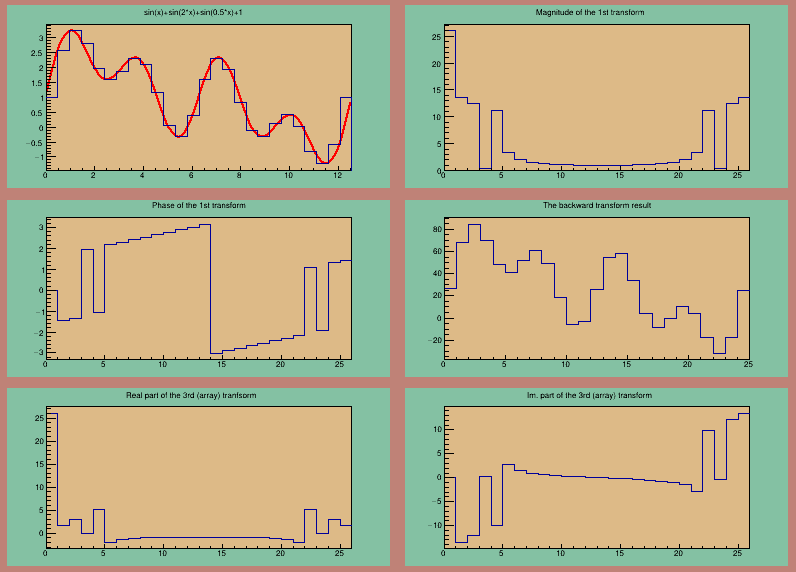

In [10]:
gROOT->GetListOfCanvases()->Last()->Draw()